<a href="https://colab.research.google.com/github/Tamzid19597/CryptoCurrencyPricePrediction/blob/main/ARIMA-Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries**

MAPE score 2.2%
accuracy 97.8%

In [ ]:
!pip install yfinance

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

from statsmodels.tsa.arima_model import ARIMA
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import yfinance as yf
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler


In [ ]:
df=pd.read_csv("drive/My Drive/ThesisFinal/BTC-USD-WEEKLY.csv")
# column = 'Volume'
# scaler = MinMaxScaler(feature_range=(0, 100))
# df[column] = scaler.fit_transform(df[column].values[:, None])
df

In [ ]:
df_nasdaq=pd.read_csv('drive/My Drive/ThesisFinal/NASDAQ-WEEKLY.csv')
# column = 'Volume'
# scaler = MinMaxScaler(feature_range=(0, 100))
# df[column] = scaler.fit_transform(df[column].values[:, None])
df_nasdaq

In [ ]:
plt.plot(df.index,df['Adj Close'])
plt.show()

In [ ]:
#train_test_split
to_row=  int(len(df)*0.60)
training_data=list(df[0:to_row]['Adj Close'])
testing_data=list(df[to_row:]['Adj Close'])
testing_data_nasdaq=list(df_nasdaq[to_row:]['Adj Close'])


In [ ]:
#graph plotting of test and train
# plt.figure(figsize=(15,9))
# plt.grid(True)
# plt.xlabel('Dates')
# plt.ylabel('Closing Prices')
# plt.plot(df[0:to_row]['Adj Close'], 'green', label='Train Data')
# plt.plot(df[to_row:]['Adj Close'], 'blue', label='Test Data')
# plt.legend()

In [ ]:
model_predictions= []
n_test_obser=len(testing_data)

In [ ]:
#ARIMA model
for i in range(n_test_obser):
  model=ARIMA(training_data, order= (4,1,0))
  model_fit=model.fit()
  output=model_fit.forecast()
  yhat=list(output[0])[0]
  model_predictions.append(yhat)
  actual_test_value=testing_data[i]
  training_data.append(actual_test_value)

  

In [ ]:
model_fit.summary()

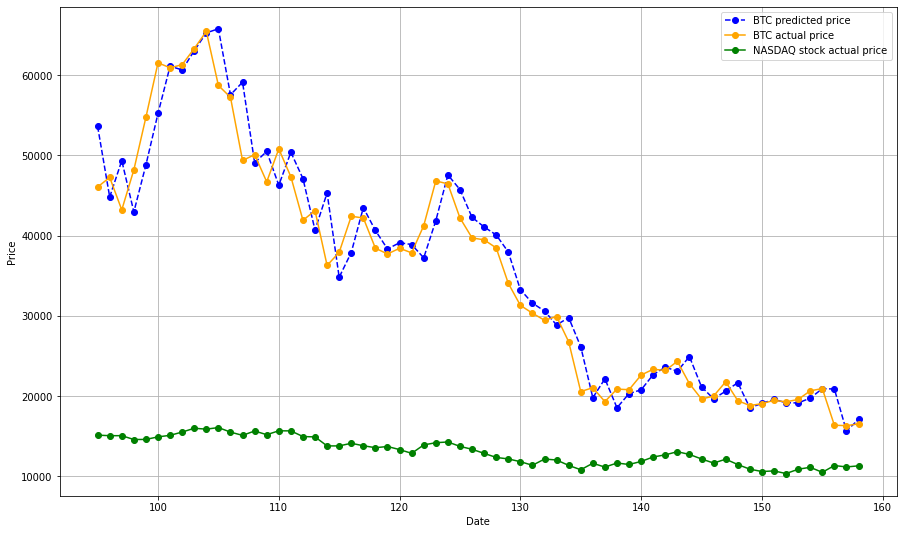

In [ ]:
#graph plotting of test and train
plt.figure(figsize=(15,9))
plt.grid(True)
date_range=df[to_row:].index
date_range_nasdaq=df_nasdaq[to_row:].index
plt.plot(date_range, model_predictions, color='blue', marker='o', linestyle='dashed', label='BTC predicted price')
plt.plot(date_range, testing_data, color='orange', marker='o', label='BTC actual price')
plt.plot(date_range_nasdaq, testing_data_nasdaq, color='green', marker='o', label='NASDAQ stock actual price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

Mounted at /content/drive


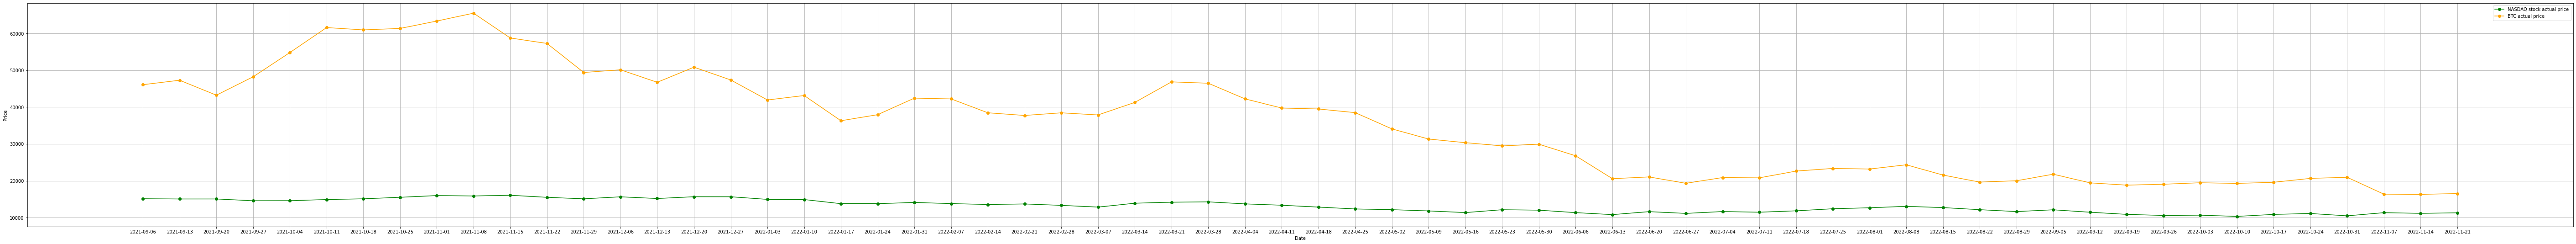

In [ ]:
plt.figure(figsize=(100,9))
plt.grid(True)

date_range=df[to_row:].Date
date_range_nasdaq=df_nasdaq[to_row:].Date

#plt.plot(date_range, model_predictions, color='blue', marker='o', linestyle='dashed', label='NVDA stock predicted price')
plt.plot(date_range_nasdaq, testing_data_nasdaq, color='green', marker='o', label='NASDAQ stock actual price')
plt.plot(date_range, testing_data, color='orange', marker='o', label='BTC actual price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
mape=np.mean(np.abs(np.array(model_predictions)-np.array(testing_data))/np.abs(testing_data))
print('MAPE: '+ str(mape*100)+ '%')

MAPE: 1.6061291926680326%
